In [1]:
# importing neccesary files 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import (accuracy_score, classification_report)

# Exploratory Data Analysis

In [2]:
# loading the data 

data = pd.read_csv('Datasets/EmployeeData.csv')
pd.set_option('display.max_columns', None)  
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

Hence, no null values. And, the dataset contains few numeric and few non-numeric columns.

## Analysing Data

In [4]:
data['Attrition'].value_counts()   # 0 - Likely to stay,  1 - Likely to leave the company

0    1233
1     237
Name: Attrition, dtype: int64

In [5]:
a = 1233
b = 237
 
print(a / (a+b)) #for 1 
print(b / (a+b))  # for 0

0.8387755102040816
0.16122448979591836


Dataset is highly imbalance

In [6]:
data['EmployeeCount'].value_counts() # To be removed

1    1470
Name: EmployeeCount, dtype: int64

In [7]:
data['Over18'].value_counts() # To be removed

Y    1470
Name: Over18, dtype: int64

In [8]:
data['StandardHours'].value_counts() # To be removed

80    1470
Name: StandardHours, dtype: int64

In [9]:
data['EmployeeNumber'].value_counts() # To be removed

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

### Data to be removed 

Found few columns which do not make any impact over the dataset hence better being removed.

EmployeeCount, Over18, StandardHours : Reason - No distinct values or zero variance
    
EmployeeNumber : Reason - All distinct values which won't affect the data

In [10]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

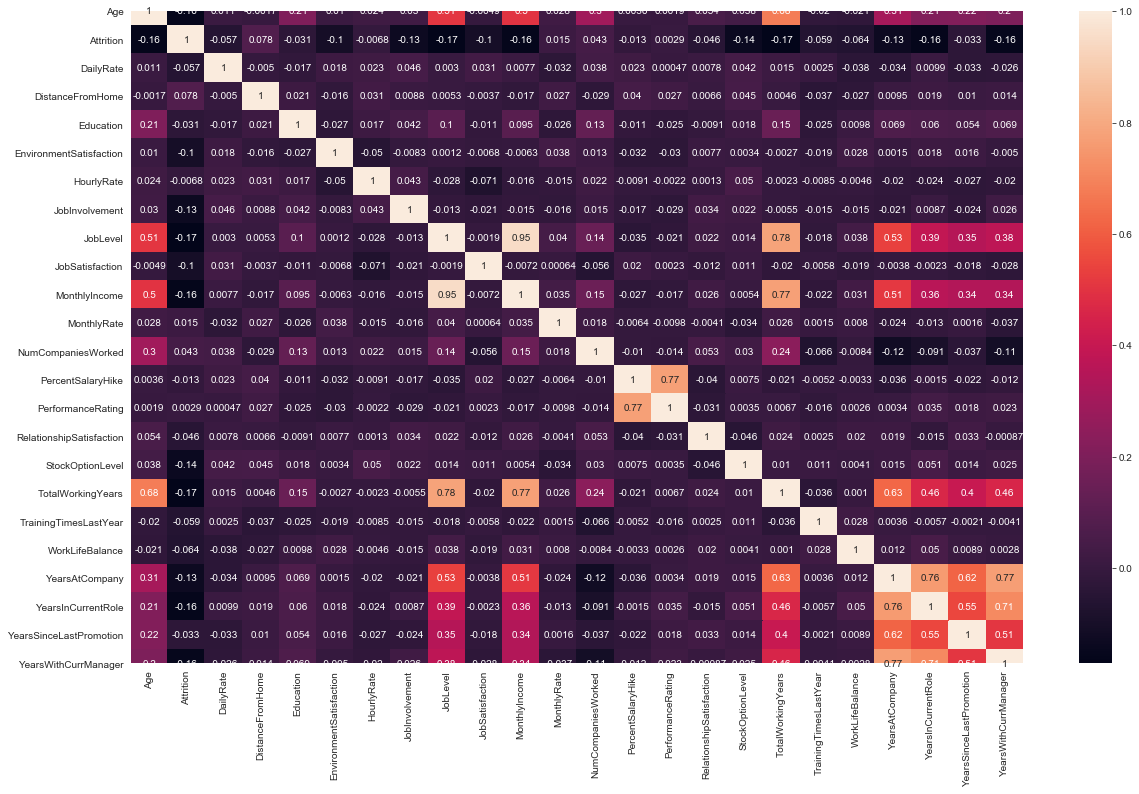

In [11]:
corr = data.corr()  

f , ax = plt.subplots(figsize = (20, 12) )

sns.heatmap(corr, vmax = 1, annot = True)

## Analysis over Attrition

In [12]:
data.groupby('Attrition').mean() # Figuring out the mean values of Attrition 0 and 1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [13]:
df = data[data['Attrition'] == 1] #Filtering the data

### Attrition vs Job Roles

[Text(0, 0, 'Laboratory Technician'),
 Text(0, 0, 'Sales Executive'),
 Text(0, 0, 'Research Scientist'),
 Text(0, 0, 'Sales Representative'),
 Text(0, 0, 'Human Resources'),
 Text(0, 0, 'Manufacturing Director'),
 Text(0, 0, 'Healthcare Representative'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Research Director')]

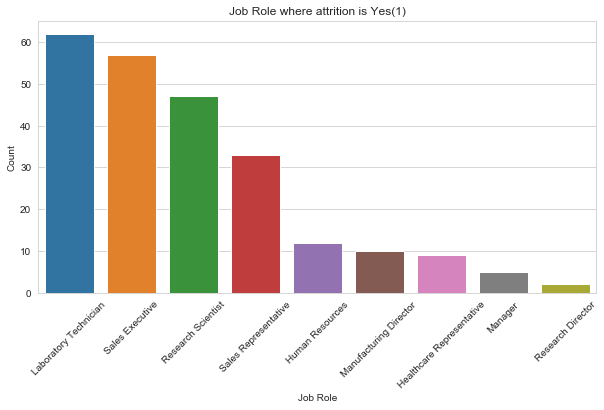

In [14]:
temp = df.JobRole.value_counts()

x = temp.index
y = temp.values

plt.figure(figsize = (10, 5))

ax = sns.barplot(x = x, y = y)

plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title("Job Role where attrition is Yes(1)")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Looks like the most number of employee who are likely to quit the job have Laboratory Technician as their Job Role.

Further Analysing....

In [15]:
JobRoleCrossTab = pd.crosstab(data.JobRole, data.Attrition, margins = True)
JobRoleCrossTab

Attrition,0,1,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [16]:
JobRoleCrossTab.div(JobRoleCrossTab['All'], axis = 0)

Attrition,0,1,All
JobRole,,,
Healthcare Representative,0.931298,0.068702,1.0
Human Resources,0.769231,0.230769,1.0
Laboratory Technician,0.760618,0.239382,1.0
Manager,0.950980,0.049020,1.0
Manufacturing Director,0.931034,0.068966,1.0
Research Director,0.975000,0.025000,1.0
Research Scientist,0.839041,0.160959,1.0
Sales Executive,0.825153,0.174847,1.0
Sales Representative,0.602410,0.397590,1.0


From this we can infer that :-

1 The highest percentage(i.e. 39) of the employee who are likely to quit the job have Sales Representative as their Job Role.

2 Their are few similarily between few JOB ROLES such as Human Resources & Laboratory Technician, Healthcare      Representative & Manufacturing Director.

### Further Analysis on Tablueau...

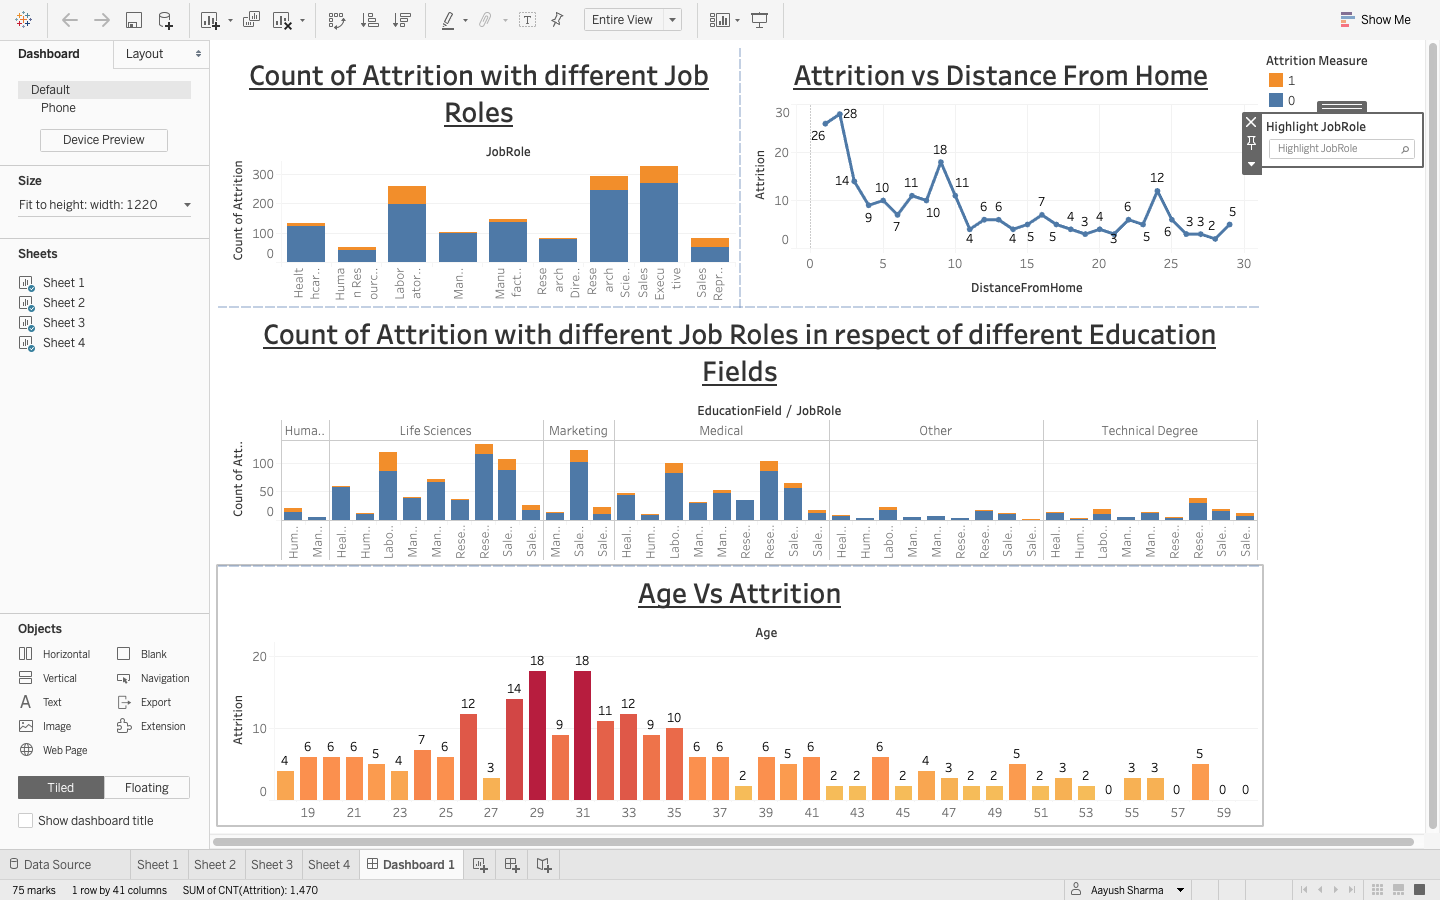

# Pre - processing Data

In [17]:
final_data = pd.get_dummies(data)

In [18]:
final_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [19]:
final_data.shape

(1470, 52)

In [20]:
Y = final_data['Attrition']
X = final_data.drop(labels = 'Attrition' , axis = 1)
X.shape, Y.shape

((1470, 51), (1470,))

# Applying Machine Learning Models

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y)

In [22]:
Y_train.value_counts()[1] / (Y_train.value_counts()[0] + Y_train.value_counts()[1]) * 100

16.152450090744104

In [23]:
Y_test.value_counts()[1] / (Y_test.value_counts()[0] + Y_test.value_counts()[1]) * 100

16.032608695652172

## If we directly predict everything for 0 the model would still givee us 83+ % of accuracy. Hence the key metrics to look at would be Precision and Recall for Class 1.






By using stratify we can see that the test values and train values are balanced

## 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l1', solver = 'liblinear')

clf.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [25]:
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

In [26]:
clf.score(X_train, Y_train)

0.8929219600725953

In [27]:
clf.score(X_test, Y_test)

0.8831521739130435

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, Y_pred_train)

print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       924
           1       0.81      0.44      0.57       178

    accuracy                           0.89      1102
   macro avg       0.85      0.71      0.76      1102
weighted avg       0.89      0.89      0.88      1102



In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_test)

print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       309
           1       0.81      0.36      0.49        59

    accuracy                           0.88       368
   macro avg       0.85      0.67      0.71       368
weighted avg       0.88      0.88      0.86       368



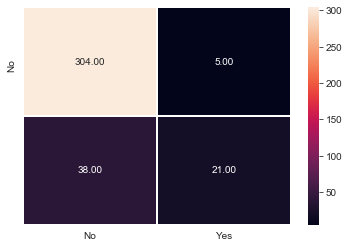

In [30]:
ax = sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = 1 , xticklabels = ['No', 'Yes'], yticklabels = ['No'])


## 2. Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, Y_train)

GaussianNB()

In [32]:
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

In [33]:
clf.score(X_train, Y_train)

0.8148820326678766

In [34]:
clf.score(X_test, Y_test)

0.8016304347826086

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, Y_pred_train)

print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       924
           1       0.45      0.69      0.55       178

    accuracy                           0.81      1102
   macro avg       0.69      0.76      0.72      1102
weighted avg       0.86      0.81      0.83      1102



In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_test)
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       309
           1       0.42      0.64      0.51        59

    accuracy                           0.80       368
   macro avg       0.67      0.74      0.69       368
weighted avg       0.84      0.80      0.82       368



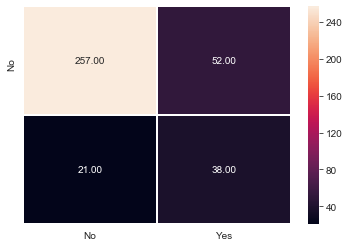

In [37]:
ax = sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = 1 , xticklabels = ['No', 'Yes'], yticklabels = ['No'])

## 3. SVM Classifier

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', verbose = True)

clf.fit(X_train, Y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [40]:
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

In [41]:
clf.score(X_train, Y_train)

0.8929219600725953

In [42]:
clf.score(X_test, Y_test)

0.8831521739130435

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, Y_pred_train)
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       924
           1       0.80      0.45      0.58       178

    accuracy                           0.89      1102
   macro avg       0.85      0.71      0.76      1102
weighted avg       0.89      0.89      0.88      1102



In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_test)
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       309
           1       0.81      0.36      0.49        59

    accuracy                           0.88       368
   macro avg       0.85      0.67      0.71       368
weighted avg       0.88      0.88      0.86       368



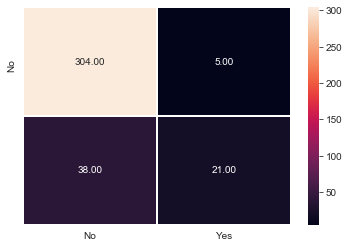

In [45]:
ax = sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = 1 , xticklabels = ['No', 'Yes'], yticklabels = ['No'])

# The accuracy is greater then 83% but the precision and recall for class have been really poor.

The reason might be imbalance data...

Therefore, using SMOTE (Synthetic Minority Oversampling Technique), this will ensure that the data is balanced for both the classes by creating data points for minority class.

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [47]:
X_smote, Y_smote = smote.fit_sample(X, Y)
X_smote.shape, Y_smote.shape

((2466, 51), (2466,))

In [48]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state = 0)

# Applying Machine Learning Models after SMOTE

# 4. Logistic Regression (SMOTE)

In [49]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 8543)

clf.fit(X_train_smote, Y_train_smote)

LogisticRegression(max_iter=8543, penalty='l1', solver='liblinear')

In [50]:
Y_pred_smote_train = clf.predict(X_train_smote)
Y_pred_smote_test = clf.predict(X_test_smote)

In [51]:
clf.score(X_train_smote, Y_train_smote)

0.9367225527312061

In [52]:
clf.score(X_test_smote, Y_test_smote)

0.9205834683954619

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train_smote, Y_pred_smote_train)

print(classification_report(Y_train_smote, Y_pred_smote_train))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       934
           1       0.97      0.90      0.93       915

    accuracy                           0.94      1849
   macro avg       0.94      0.94      0.94      1849
weighted avg       0.94      0.94      0.94      1849



In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_smote, Y_pred_smote_test)

print(classification_report(Y_test_smote, Y_pred_smote_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       299
           1       0.97      0.87      0.92       318

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.93      0.92      0.92       617



# 5. SVM (SMOTE)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smote = sc.fit_transform(X_train_smote)
X_test_smote = sc.transform(X_test_smote)

In [56]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', verbose= True)

clf.fit(X_train_smote, Y_train_smote)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [57]:
Y_pred_smote_train = clf.predict(X_train_smote)
Y_pred_smote_test = clf.predict(X_test_smote)

In [58]:
clf.score(X_train_smote, Y_train_smote)

0.9388858842617631

In [59]:
clf.score(X_test_smote, Y_test_smote)

0.9254457050243112

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train_smote, Y_pred_smote_train)

print(classification_report(Y_train_smote, Y_pred_smote_train))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       934
           1       0.98      0.90      0.94       915

    accuracy                           0.94      1849
   macro avg       0.94      0.94      0.94      1849
weighted avg       0.94      0.94      0.94      1849



In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_smote, Y_pred_smote_test)

print(classification_report(Y_test_smote, Y_pred_smote_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       299
           1       0.99      0.86      0.92       318

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



# 6. Random Forest (SMOTE)

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 6 )

clf.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(max_depth=6)

In [75]:
Y_pred_smote_test = clf.predict(X_test_smote)
Y_pred_smote_train = clf.predict(X_train_smote)

In [76]:
clf.score(X_train_smote, Y_train_smote)

0.9545700378583017

In [77]:
clf.score(X_test_smote, Y_test_smote)

0.9059967585089141

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train_smote, Y_pred_smote_train)

print(classification_report(Y_train_smote, Y_pred_smote_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       934
           1       0.98      0.93      0.95       915

    accuracy                           0.95      1849
   macro avg       0.96      0.95      0.95      1849
weighted avg       0.96      0.95      0.95      1849



In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_smote, Y_pred_smote_test)

print(classification_report(Y_test_smote, Y_pred_smote_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       299
           1       0.95      0.87      0.90       318

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617



In [89]:
print(cm)


[[283  16]
 [ 42 276]]


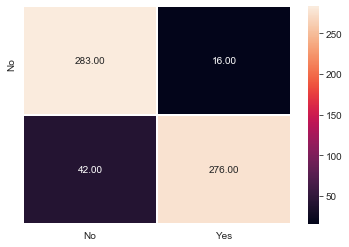

In [86]:
ax = sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = 1 , xticklabels = ['No', 'Yes'], yticklabels = ['No'])

# Conclusion

Best model to be found is SVM with SMOTE with the training accuracy of 0.94 and the testing accuracy of 0.93